# 01ZLMA - Exercise 05

Exercise 05 of the course 01ZLMA. 

# Model Diagnostics - Post-hoc analysis of glm

How to check if our GLM is sufficient and how to do it in R.



## Dataset trees

The volume y (in cubic feet) of 31 black cherry trees (střemcha pozdní) was measured as well as the height (in feet) and the girth, or diameter,
at breast height (in inches). The volume of the tree is related to the volume of timber, which is important economically. 


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [ ]:
# import dataset -> put dataset in files in google colab
trees = pd.read_excel('/content/trees.xlsx')
trees

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


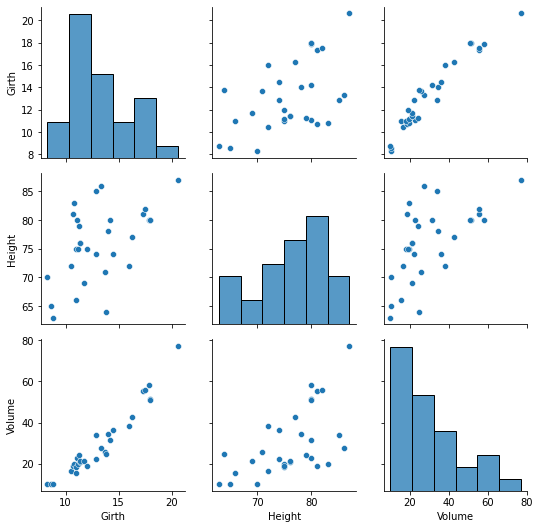

In [ ]:
# basic graphs of dataset
g = sns.PairGrid(trees)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

The relationships between the tree volume and height, and tree volume and girth, both appear non-linear.

In [ ]:
log_trees = trees.copy()
log_trees['log_Girth'] = np.log(trees['Girth'])
log_trees['log_Height'] = np.log(trees['Height'])
log_trees['log_Volume'] = np.log(trees['Volume'])
log_trees.head()

,Girth,Height,Volume,log_Girth,log_Height,log_Volume
0,8.3,70,10.3,2.116256,4.248495,2.332144
1,8.6,65,10.3,2.151762,4.174387,2.332144
2,8.8,63,10.2,2.174752,4.143135,2.322388
3,10.5,72,16.4,2.351375,4.276666,2.797281
4,10.7,81,18.8,2.370244,4.394449,2.933857


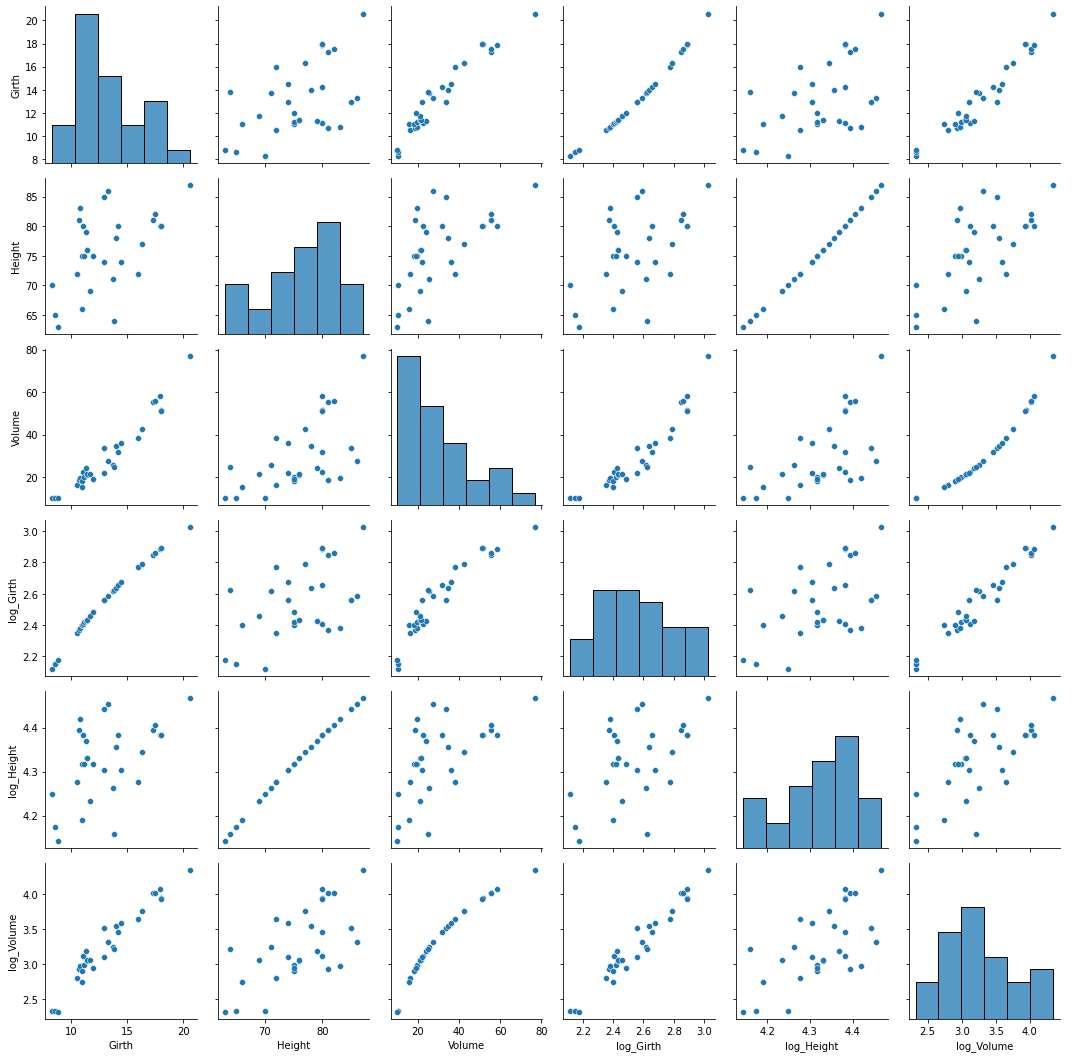

In [ ]:
h = sns.PairGrid(log_trees)
h.map_diag(sns.histplot)
h.map_offdiag(sns.scatterplot)
h.add_legend()

In [ ]:
trans_trees = trees.copy()
trans_trees['cone'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/12
trans_trees['cylinder'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/4
trans_trees.head()

,Girth,Height,Volume,cone,cylinder
0,8.3,70,10.3,8.767189,26.301566
1,8.6,65,10.3,8.740100,26.220300
2,8.8,63,10.2,8.869763,26.609290
3,10.5,72,16.4,14.431691,43.295074
4,10.7,81,18.8,16.860044,50.580133


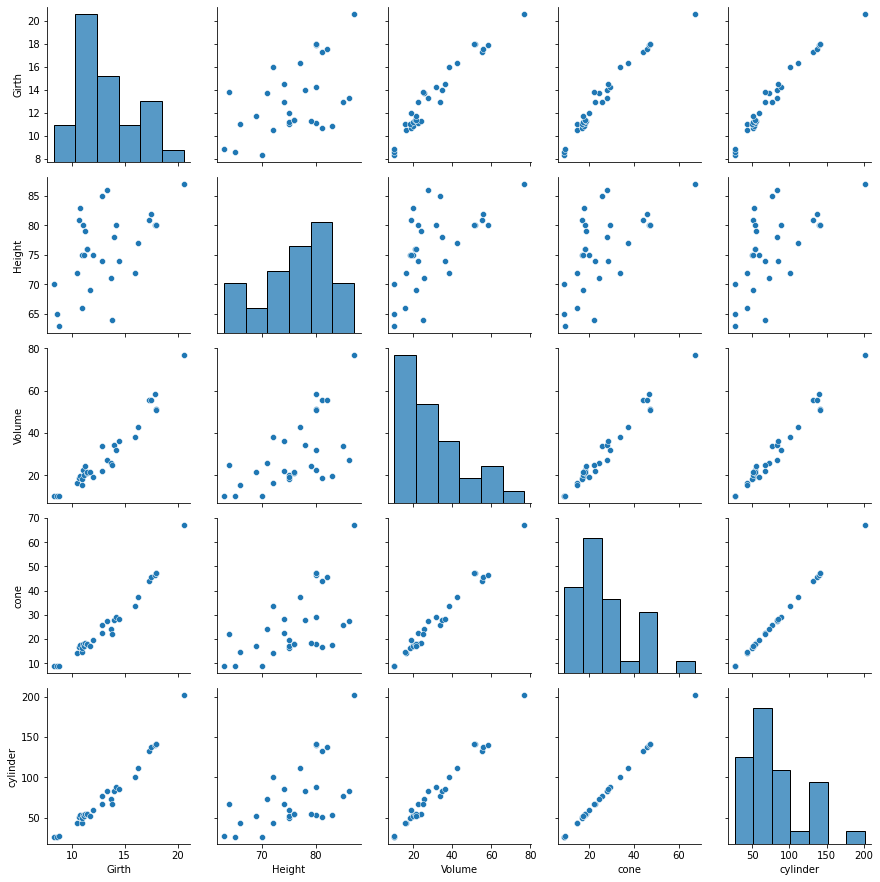

In [ ]:
i = sns.PairGrid(trans_trees)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)

## Classical Regression analysis approach
How we did it last term ...

### Model 0 lm()

In [ ]:
trees_m0a = smf.ols(formula='log_Volume ~ log_Girth + log_Height', data=log_trees).fit()
print(trees_m0a.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Volume   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     613.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           7.62e-24
Time:                        11:00:19   Log-Likelihood:                 35.356
No. Observations:                  31   AIC:                            -64.71
Df Residuals:                      28   BIC:                            -60.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6316      0.800     -8.292      0.0

If we understand given problem, we can find good linear relation with some advanced transformation of independent varialbes.

In [ ]:
trees_m0b = smf.ols(formula='Volume ~ cone - 1', data=trans_trees).fit()
print(trees_m0b.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                    4.14e-36
Time:                        11:00:19   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
trees_m0c = smf.ols(formula='Volume ~ cylinder - 1', data=trans_trees).fit()
print(trees_m0c.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                    4.14e-36
Time:                        11:00:19   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## GLM approach
Since response is continuous nonnegative variable, we use `family = gamma`. In the first approach we try canonical link function, which is for gamma distribution: $g(\mu) = 1/\mu$.

### Model 1 (_m1)

In [ ]:
trees_m1 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma()).fit()
print(trees_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Thu, 04 Aug 2022   Deviance:                       1.3038
Time:                        11:00:19   Pearson chi2:                     1.17
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


### Questions:

* What can you say from the `summary()` about the model 0? 
* Do you understand to all numbers and do you know how they were computed?

### Tasks

* Compute different types of residuals.
* Plot residuals vs. fitted values or regressors
* Validate used ling function with working responses.
* Validate used regressors with Component+Residual, ie Partial Residual Plots

## Residuals
Consider  the GLM from for the observations $Y_1,\ldots,Y_n$ and assume $a_i(\phi) = a_i \phi$, where $a_i>0$ are known for $i=1,\ldots, n$.



From estimation of GLMs as Locally Like Linear Regression by using IRLS we can obtain weights $W$ with  *working responses* and compute *working residuals*.

**Working residuals**
$$e_i = z_i − \hat{\eta_i}$$

**Pearson residuals**

$$ {r_{i}^{P}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i\, v(\hat\mu_i)}}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

where $v(\mu_i)$ is called a variance function and $V[Y_i] = a_i \phi v(\mu_i)$.
The Pearson residual is the response residual scaled with with the estimated standard deviation for the observation.


**Pearson standartized residuals**

$$
{r_{i}^{PS}
=}\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{\hat{V}[Y_{i}](1-h_{ii})}}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i \hat\phi \, v(\hat\mu_i)(1-h_{ii})}}
={\frac{r_{i}^{P}}{\sqrt{\hat\phi(1-h_{ii})}}},
$$

**Anscombe residuals**

For models, where $a_i(\phi)=1$ 
$$
{r_{i}^{A}=\frac{A(y_{i})-A(\hat{\mu}_{i})}{\sqrt{\hat{V}[A(y_{i})]}}},\quad i=1,...,n
$$
where
$$
A(y)=\int_{-\infty}^{y}\frac{d\mu}{v^{1/3}(\mu)}.
$$

**Deviance residual**

The deviance residual for the i’th observation is defined as

$$
{r_{i}^{D}=\mbox{sign} (y_{i}-\hat{\mu}_{i})\sqrt{D_{i}}},\quad i=1,...,n, 
$$
where
$$ 
D=\sum_{i=1}^{n}(r_{i}^{D})^{2} = \sum_{i=1}^{n}D_{i}=
\sum_{i=1}^{n}\frac{2}{a_{i}}\left[y_{i}(\tilde{\theta}_{i}-
\hat{\theta}_{i})-\left(b(\tilde{\theta}_{i})-b(\hat{\theta}_{i})\right)\right].
$$


**Deviance standartized residual**
$$
{r_{i}^{DS}=\frac{r_{i}^{D}}{\sqrt{\hat\phi(1-h_{ii})}}},\quad i=1,...,n,
$$

The deviance residuals are the generalization of the residuals from the classical linear model. They are constructed using the analogy between the deviance and the RSS.

Gamma model is necessarily heteroskedastic, because the variance is  proportional to $μ^2$.

In [ ]:
# Residuals
expected = trees_m1.predict(exog=trees) # missing!
print(expected)
estimates = trees_m1.fittedvalues
v = estimates**2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution, v = estiamtes, Bernouli v = estiamtes(1-estiamtes), ....

0      16.441717
1      16.396985
2      16.463283
3      19.339542
4      20.608704
5      21.008883
6      19.470138
7      20.426392
8      21.172750
9      20.757069
10     21.405133
11     21.218229
12     21.218229
13     20.907585
14     22.194254
15     23.915288
16     25.723138
17     26.991631
18     25.318968
19     24.404388
20     27.430254
21     28.456088
22     28.109667
23     33.047014
24     36.030513
25     43.886498
26     46.000320
27     48.277761
28     49.204089
29     49.204089
30    120.271403
dtype: float64


In [ ]:
# Response residuals
r_response1 = trees_m1.resid_response
r_response2 = expected - estimates
df = pd.DataFrame(r_response1)
df['r_response2'] = r_response2
df

,0,r_response2
0,-6.141717,0.0
1,-6.096985,0.0
2,-6.263283,0.0
3,-2.939542,0.0
4,-1.808704,0.0
5,-1.308883,0.0
6,-3.870138,0.0
7,-2.226392,0.0
8,1.427250,0.0
9,-0.857069,0.0


In [ ]:
# Working residuals
r_working1 = trees_m1.resid_working
r_working2 = (expected - estimates) / v
df['r_working1'] = r_working1
df['r_working2'] = r_working2
df

,0,r_response2,r_working1,r_working2
0,-6.141717,0.0,0.022719,0.0
1,-6.096985,0.0,0.022677,0.0
2,-6.263283,0.0,0.023108,0.0
3,-2.939542,0.0,0.007859,0.0
4,-1.808704,0.0,0.004259,0.0
5,-1.308883,0.0,0.002965,0.0
6,-3.870138,0.0,0.010209,0.0
7,-2.226392,0.0,0.005336,0.0
8,1.427250,0.0,-0.003184,0.0
9,-0.857069,0.0,0.001989,0.0


In [ ]:
# Pearson residuals
r_pearson1 = trees_m1.resid_pearson # Pearson residuals from resid() function
r_pearson2 = (expected - estimates) / np.sqrt(v)    # Pearson residuals from above definitionf for gamma
df['r_pearson1'] = r_pearson1
df['r_pearson2'] = r_pearson2
df

,0,r_response2,r_working1,r_working2,r_pearson1,r_pearson2
0,-6.141717,0.0,0.022719,0.0,-0.373545,0.0
1,-6.096985,0.0,0.022677,0.0,-0.371836,0.0
2,-6.263283,0.0,0.023108,0.0,-0.380439,0.0
3,-2.939542,0.0,0.007859,0.0,-0.151996,0.0
4,-1.808704,0.0,0.004259,0.0,-0.087764,0.0
5,-1.308883,0.0,0.002965,0.0,-0.062301,0.0
6,-3.870138,0.0,0.010209,0.0,-0.198773,0.0
7,-2.226392,0.0,0.005336,0.0,-0.108996,0.0
8,1.427250,0.0,-0.003184,0.0,0.067410,0.0
9,-0.857069,0.0,0.001989,0.0,-0.041290,0.0


In [ ]:
# missing
''' in R:
# Pearson standartized residuals
r_pearson_std1 <- rstandard(trees_m1, type = "pearson") 

# compute estimation of dispersion parametr phi by hand and from summary function
w <- weights(trees_m1, type="working")
e <- residuals(trees_m1, type="working")
phi_est_hand <- sum(w * e^2) /df.residual(trees_m1)
phi_est <- summary(trees_m1)$dispersion # Pearsons estiamtes of phi
cbind(phi_est_hand, phi_est)
# Pearson standartized residuals by hand
r_pearson_std2 <- r_pearson2 / sqrt(phi_est*(1 - hatvalues(trees_m1)) )
head(cbind(r_pearson_std1,r_pearson_std2))'''


' in R:\n# Pearson standartized residuals\nr_pearson_std1 <- rstandard(trees_m1, type = "pearson") \n\n# compute estimation of dispersion parametr phi by hand and from summary function\nw <- weights(trees_m1, type="working")\ne <- residuals(trees_m1, type="working")\nphi_est_hand <- sum(w * e^2) /df.residual(trees_m1)\nphi_est <- summary(trees_m1)$dispersion # Pearsons estiamtes of phi\ncbind(phi_est_hand, phi_est)\n# Pearson standartized residuals by hand\nr_pearson_std2 <- r_pearson2 / sqrt(phi_est*(1 - hatvalues(trees_m1)) )\nhead(cbind(r_pearson_std1,r_pearson_std2))'

In [ ]:
trees_modeled = trees.copy()

In [ ]:
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotnine import ggplot, aes, geom_line, geom_smooth, geom_abline, geom_point, labs, geom_qq_line, geom_qq

%matplotlib inline

In [ ]:
trees['fitted'] = trees_m1.fittedvalues

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


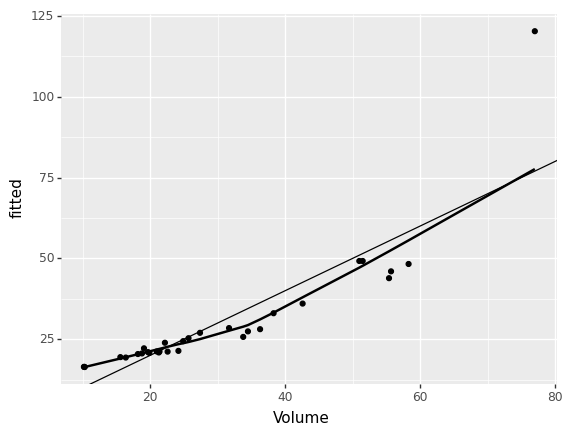

<ggplot: (8732186628177)>

In [ ]:
ggplot(trees, aes(x = 'Volume', y = 'fitted')) + \
      geom_smooth()+ \
      geom_point() + \
      geom_abline(intercept = 0, slope = 1) \

Plots of the residuals against the fitted values $\mu$ and the residuals against
$x_j$ are the main tools for diagnostic analysis. Using deviance residuals is preferred in these plots because they have approximately constant variance.

In [ ]:
# missing

If the evidence shows problems with the systematic component, then the
cause may be an incorrect link function, or an incorrect linear predictor (for
example, important explanatory variables are missing, or covariates should
be transformed), or both.

*Working responses* $z_i = \hat\eta_i + g^\prime(\hat\mu_i) (y_i-\hat\mu_i)$ 
 can be determined from working residuals, obtained by the function `resid(model, type="working")`. 

 We plot Working responses against predicted values of linear predictor $\hat\eta_i$.


In [ ]:
# missing
''' in R:
eta <- trees_m1$linear.predictor
z  <- resid(trees_m1, type="working") + eta
plot( z ~ eta, las=1,
        xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")
'''

' in R:\neta <- trees_m1$linear.predictor\nz  <- resid(trees_m1, type="working") + eta\nplot( z ~ eta, las=1,\n        xlab="Linear predictor, eta", ylab="Working responses, z")\nabline(0, 1, col="grey")\n'

To determine if covariate $x_j$ is included on the incorrect scale, use partial
residuals
$$ u_j = e_i + \hat{\beta}_j x_j.$$
In R use function `resid(fit, type="partial")`. 

Component+Residual (Partial Residual plot, ie. $x_j$ against $j$th partial residuals) can be plotted by function `termplot()` or `crPlots()` from the library `cars`

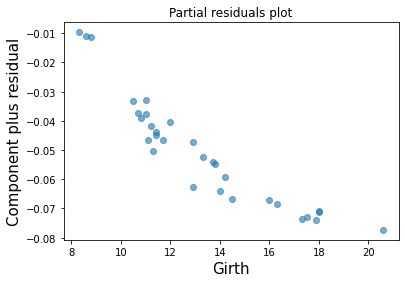

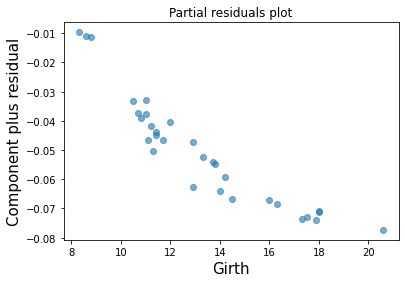

In [ ]:
trees_m1.plot_partial_residuals('Girth')

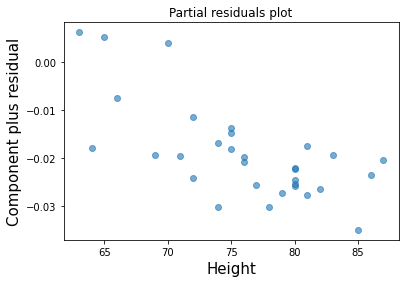

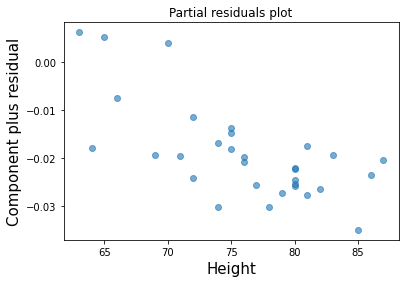

In [ ]:
trees_m1.plot_partial_residuals('Height')

In [ ]:
# missing termplot

### Model 2 (_m2)

Let's try gamma distribution with link function $g(\mu)=\log \mu$. 

In [ ]:
trees_m2 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma(link=sm.families.links.log)).fit()
print(trees_m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                       0.0094102
Method:                          IRLS   Log-Likelihood:                -71.590
Date:                Thu, 04 Aug 2022   Deviance:                      0.26247
Time:                        11:00:24   Pearson chi2:                    0.263
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0923      0.216      0.428      0.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.



Similar plots and analysis we did with model 01. 

In [ ]:
# missing = nejsou stand.!
trees_modeled['fitted2'] = trees_m2.fittedvalues
trees_modeled['r_deviance_std2'] = trees_m2.resid_deviance
trees_modeled['r_pearson_std2'] = trees_m2.resid_pearson
trees_modeled

,Girth,Height,Volume,fitted2,r_deviance_std2,r_pearson_std2
0,8.3,70,10.3,11.688319,-0.123837,-0.118778
1,8.6,65,10.3,11.237820,-0.085894,-0.083452
2,8.8,63,10.2,11.191845,-0.091384,-0.088622
3,10.5,72,16.4,16.632598,-0.014050,-0.013984
4,10.7,81,18.8,19.878164,-0.055251,-0.054239
5,10.8,83,19.7,20.848995,-0.056157,-0.055110
6,11.0,66,15.6,16.192331,-0.037037,-0.036581
7,11.0,75,18.2,18.797781,-0.032144,-0.031801
8,11.1,80,22.6,20.721181,0.088067,0.090671
9,11.2,75,19.9,19.351986,0.028055,0.028318


/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


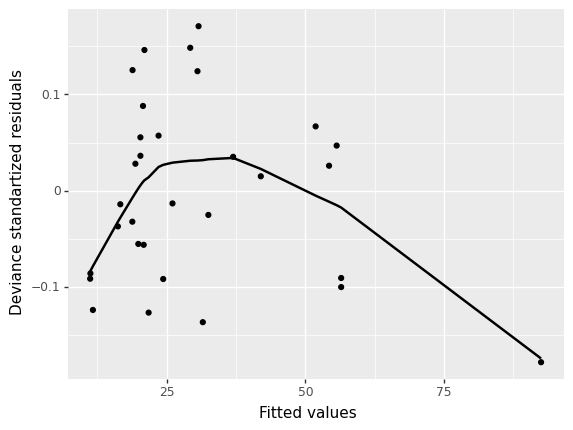

<ggplot: (8732186548753)>

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['fitted2'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


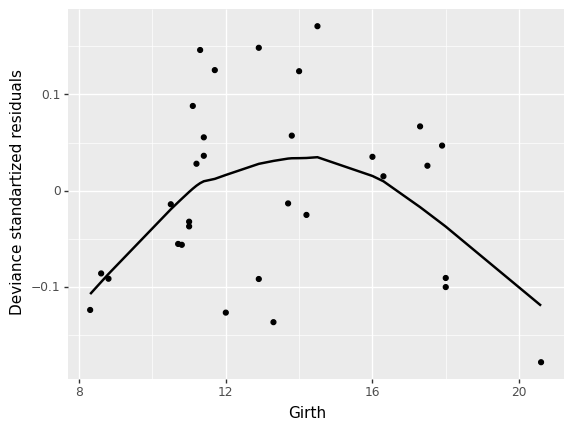

<ggplot: (8732186568393)>

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Girth'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Girth",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


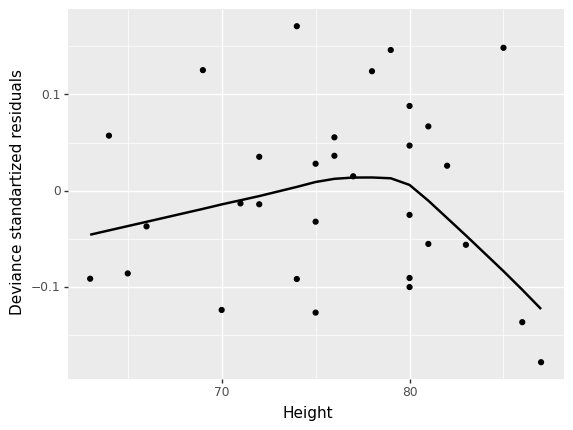

<ggplot: (8732186587557)>

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Height'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Height",
       y = "Deviance standartized residuals")

In [ ]:
# missing linear predictor

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [ ]:
trees_m3 = smf.glm('Volume ~  log_Height + log_Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.log)).fit()
print(trees_m3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                       0.0064273
Method:                          IRLS   Log-Likelihood:                -66.003
Date:                Thu, 04 Aug 2022   Deviance:                      0.18352
Time:                        11:00:25   Pearson chi2:                    0.180
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6911      0.788     -8.493      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


All covariates are significant in the model.



In [ ]:
# missing = nejsou stand.
fitted3 = trees_m3.fittedvalues
r_deviance_std3 = trees_m3.resid_deviance
r_pearson_std3 = trees_m3.resid_pearson

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


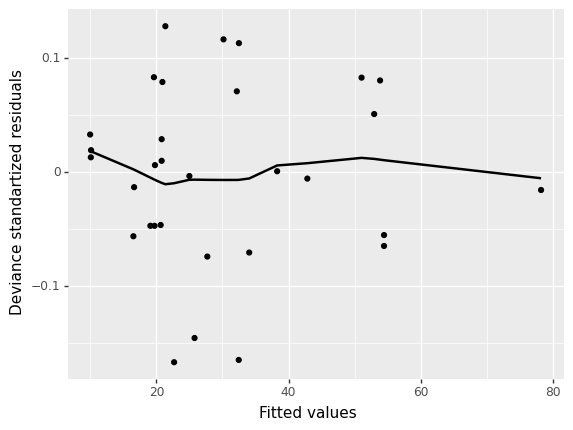

<ggplot: (8732186473957)>

In [ ]:
ggplot(trees_modeled, aes(x = fitted3, y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


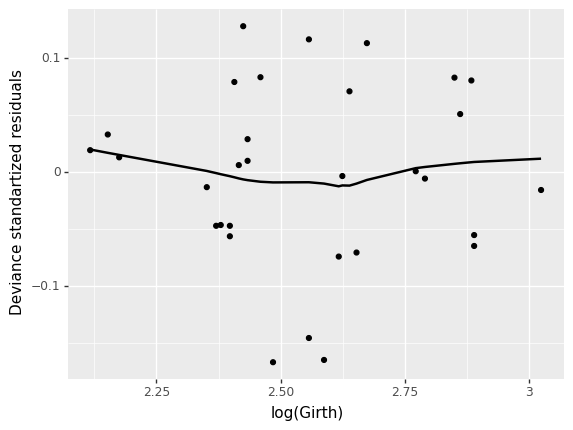

<ggplot: (8732186443817)>

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Girth'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Girth)",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


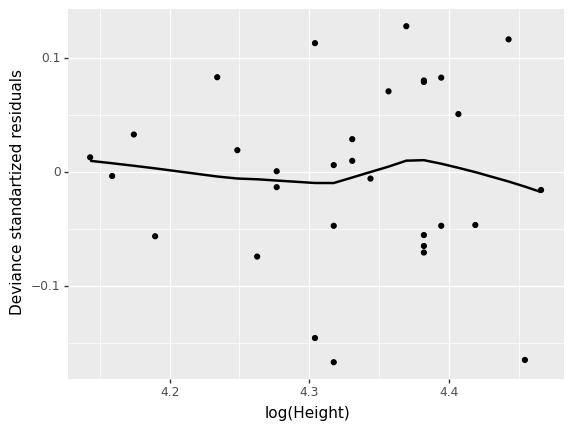

<ggplot: (8732190857413)>

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Height'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Height)",
       y = "Deviance standartized residuals")

In [ ]:
# missing linear predictor

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [ ]:
AIC_1 = trees_m1.aic
AIC_2 = trees_m2.aic
AIC_3 = trees_m3.aic
print(AIC_1,AIC_2,AIC_3)

198.86982279572234 149.17995958700726 138.00600118739317


### Question:

* Why  we chose log transformation? 
* Are residuals from the model 3 normal?

In [ ]:
# missing
''' in R:
# Deviance residauls
qqnorm(r_deviance_std, las=1 )
qqline(r_deviance_std)
# Deviance residauls
qqnorm(r_pearson_std2, las=1 )
qqline(r_pearson_std2)
''' 

' in R:\n# Deviance residauls\nqqnorm(r_deviance_std, las=1 )\nqqline(r_deviance_std)\n# Deviance residauls\nqqnorm(r_pearson_std2, las=1 )\nqqline(r_pearson_std2)\n'

In [ ]:
# vychází jinak
r_anscombe = trees_m3.resid_anscombe_scaled
print(r_anscombe)

[ 0.2398519   0.41143769  0.16157351 -0.16482304 -0.58743949 -0.57876257
 -0.7019369  -0.58755253  0.98586067  0.07661602  1.5960345   0.12345412
  0.36032959  1.03808234 -2.07954762 -1.81484988  1.45223024 -2.05468442
 -0.92414383 -0.04308654  0.88375337 -0.87995421  1.41086284  0.00934558
 -0.07098211  1.03359055  0.6349358   1.00252095 -0.68883263 -0.80809153
 -0.19579718]


Check normality with test

In [ ]:
stats.kstest(r_anscombe, 'norm')

KstestResult(statistic=0.08093152364023645, pvalue=0.9771507141065146)

In [ ]:
stats.shapiro(r_anscombe)

ShapiroResult(statistic=0.9608281850814819, pvalue=0.3068162202835083)

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by 
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}} 
$$
and observation is influence if 
$$
CD_i \ > \ \frac{8}{n-2p}
$$

In [ ]:
influence = trees_m3.get_influence()
cooks = influence.cooks_distance

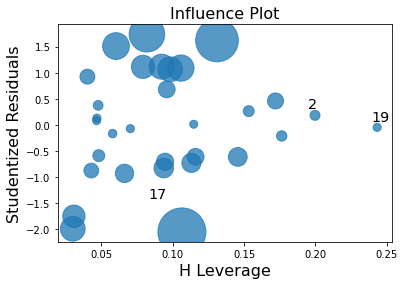

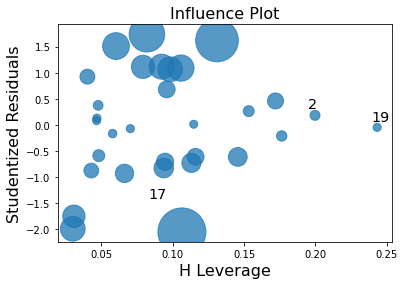

In [ ]:
influence.plot_influence()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

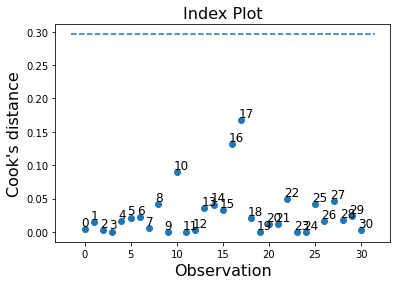

In [ ]:
influence.plot_index()
abline(0, 8/(31-4))
plt.show()

In [ ]:
hatvalues = trees_m3.get_hat_matrix_diag()

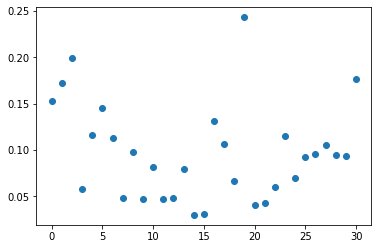

In [ ]:
plt.scatter(log_trees.index, hatvalues)
plt.show()

In [ ]:
influence = trees_m3.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum)

    dfb_Intercept  dfb_log_Height  dfb_log_Girth   cooks_d  standard_resid  \
0        0.015845        0.005200      -0.086103  0.004150        0.262323   
1        0.127620       -0.095349      -0.085377  0.014469        0.457142   
2        0.068294       -0.056528      -0.021257  0.002736        0.181386   
3       -0.010658        0.004575       0.020967  0.000585       -0.169061   
4        0.142877       -0.167338       0.167266  0.016546       -0.615037   
5        0.183073       -0.207854       0.186352  0.021584       -0.616492   
6       -0.220389        0.203264      -0.028848  0.022738       -0.731449   
7        0.014424       -0.031946       0.079066  0.005930       -0.592832   
8       -0.211246        0.247962      -0.246801  0.041223        1.065736   
9       -0.001492        0.003632      -0.009427  0.000101        0.078629   
10      -0.278287        0.331952      -0.344166  0.089804        1.737763   
11      -0.005941        0.009107      -0.015440  0.000263      

# Your Turn

## Analyse data of car accidents in Sweeden.

In [ ]:
# import dataset
url = "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden.csv"
cars = pd.read_csv(url, sep = ',', header=[0])
cars

,Year,Deaths,Cars,Fuel
0,1955,902,755,1531
1,1956,889,855,1657
2,1957,946,987,1738
3,1958,941,1098,1893
4,1959,1000,1216,2011
5,1960,1036,1324,2127
6,1961,1083,1439,2318
7,1962,1123,1562,2394
8,1963,1217,1697,2609
9,1964,1308,1810,2857


Dataset contains the number of deaths, he number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

# Tasks 

* Find the best posssible model. Try add all varariables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components. 
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.
